# Analysis of GPCR helices bind
*analysis of bend point distribution*
* use **alignment_extractor.p** to obtain data

In [2]:
import pandas as pd
import numpy as np
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [85]:
data_pair = pd.read_csv('GPCR-TM-table-identity-resis-pair.csv', index_col=None)
data_pair.head()

,index,GPCR,Family,Class,Species,pdb_active,pdb_inactive,chain_a,chain_i,TM1_active,...,TM7_best_rotation_axis_a,TM7_best_angle_a,TM7_best_RMSD(T_A),TM7_pro_point_resi,TM7_pro_rotation_axis_b,TM7_pro_angle_b,TM7_pro_rotation_axis_a,TM7_pro_angle_a,TM7_pro_RMSD(T_A),TM7_NofPRO
0,0,5-HT2C receptor,5-Hydroxytryptamine receptors,Class A (Rhodopsin),Human,6bqg,6bqh,A,A,60-81,...,"(0.192947739164, 0.154363891773, 0.652688369063)",3.816520,1.041859,365,"(0.2400606469, 0.223663522013, 0.536275831087)",5.281642848213496,"(0.0347281159718, 0.142761618188, 0.82251026584)",6.7603650008428176,1.0591294765472412,1
1,1,M2 receptor,Acetylcholine receptors (muscarinic),Class A (Rhodopsin),Human,4mqs,3uon,A,A,19-51,...,"(0.450456967764, 0.400165894638, 0.149377137598)",1.955661,1.835554,437,"(0.409758042957, 0.446360564639, 0.143881392403)",6.685730145976655,"(0.0526016537711, 0.0669041350736, 0.880494211...",34.450247515497495,1.3356281518936157,2
2,2,M2 receptor,Acetylcholine receptors (muscarinic),Class A (Rhodopsin),Human,4mqt,3uon,A,A,19-51,...,"(0.194933999954, 0.00102839194285, 0.804037608...",3.691683,1.431452,437,"(0.414756809558, 0.365747979458, 0.219495210984)",7.7967034054702,"(0.00188662206222, 0.0963226258103, 0.90179075...",37.463306300497834,1.2623016834259033,2
3,3,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3eml,A,A,2-34,...,"(0.844174243919, 0.148645708416, 0.00718004766...",4.786633,1.840638,285,"(0.285904751747, 0.299824009386, 0.414271238867)",2.709133187108024,"(0.232200101486, 0.276824446308, 0.490975452206)",32.684345773302226,1.3362765312194824,2
4,4,A2A receptor,Adenosine receptors,Class A (Rhodopsin),Human,5g53,3pwh,A,A,2-34,...,"(0.484328865579, 0.280532893033, 0.235138241388)",6.618892,2.009456,285,"(0.421252338736, 0.280036370631, 0.298711290633)",4.73213773442798,"(0.103416599055, 0.439680754787, 0.456902646158)",36.36252784904393,1.7374128103256226,2


## Dataset preparation
*Returns dataset with relaive position of rotation points*

In [11]:
def get_calc_df(tm, data):
    
    diff = []
    family_names = []
    n_of_pro = []
    names_inactive = []
    names_active = []
    best_resis = []
    pro_resis = []
    
    tm_name = 'TM' + str(tm) + '_'
    
    for idx in data['index']:
        
        if data[tm_name + 'pro_rotation_axis_b'][idx] != 'noPRO':
            diff.append(int(data[tm_name + 'best_point_resi'][idx]) - int(data[tm_name + 'pro_point_resi'][idx]))
            family_names.append(data['Family'][idx].decode('utf-8'))
            n_of_pro.append(float(data[tm_name + 'NofPRO'][idx]))
            names_inactive.append(data['pdb_inactive'][idx])
            names_active.append(data['pdb_active'][idx])
            best_resis.append(int(data[tm_name + 'best_point_resi'][idx]))
            pro_resis.append(int(data[tm_name + 'pro_point_resi'][idx]))
        
    diff = np.array(diff)
    family_names = np.array(family_names)
    n_of_pro = np.array(n_of_pro)
    names_active = np.array(names_active)
    names_inactive = np.array(names_inactive)
    pro_resis = np.array(pro_resis)
    best_resis = np.array(best_resis)
    
    calc = pd.DataFrame({'pdb_active': names_active, 'pdb_inactive': names_inactive, 'N_of_PRO': n_of_pro, 'Family': family_names, 'best-pro_TM' + str(tm): diff, 'best_point_resi': best_resis, 'pro_point_resi': pro_resis})
    return calc.fillna(0)

## Histogramm Analysis
### Histogramms of distance between best rotation point and proline rotation point

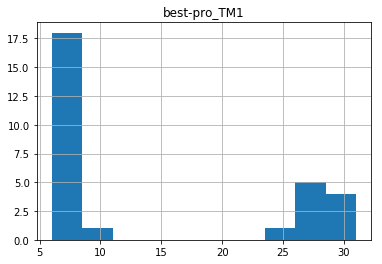

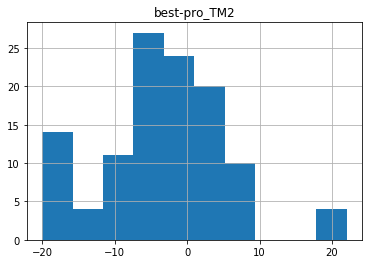

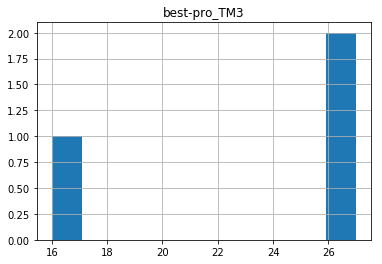

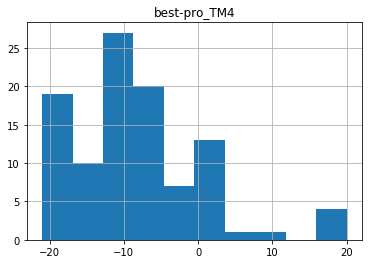

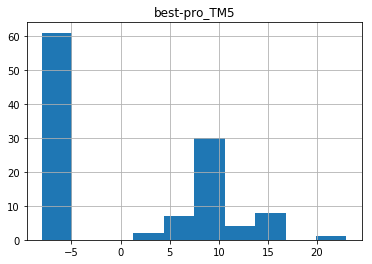

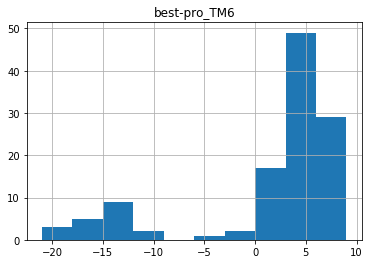

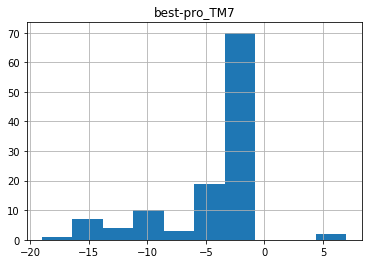

In [86]:
for tm in range (1, 8):
    result_data = get_calc_df(tm, data_pair)
    result_data.hist(column='best-pro_TM' + str(tm))

#    plt.savefig('/home/andrew/Documents/Diploma/GPCRSampling/images/best-pro_TM_new' + str(tm) + '.png', dpi=150, format='png')

### Badly distributed GPCRs analysis

In [80]:
df_tm5 = get_calc_df(5, data_pair)
df_tm7 = get_calc_df(7, data_pair)

In [84]:
df_test = df_tm5[df_tm5['best-pro_TM5'] > 0]
df_test[df_test['best-pro_TM5'] > 7.5]

,Family,N_of_PRO,best-pro_TM5,best_point_resi,pdb_active,pdb_inactive,pro_point_resi
0,5-Hydroxytryptamine receptors,2.0,13,239,6bqg,6bqh,226
1,Acetylcholine receptors (muscarinic),1.0,11,209,4mqs,3uon,198
2,Acetylcholine receptors (muscarinic),1.0,11,209,4mqt,3uon,198
9,Adenosine receptors,2.0,13,202,5g53,3vg9,189
36,Adrenoceptors,1.0,10,221,3p0g,2r4r,211
37,Adrenoceptors,1.0,10,221,4lde,2r4r,211
38,Adrenoceptors,1.0,10,221,4ldl,2r4r,211
39,Adrenoceptors,1.0,10,221,4ldo,2r4r,211
40,Adrenoceptors,1.0,10,221,4qkx,2r4r,211
41,Adrenoceptors,1.0,9,220,3p0g,2r4s,211


### Histogram of RMSD distribution

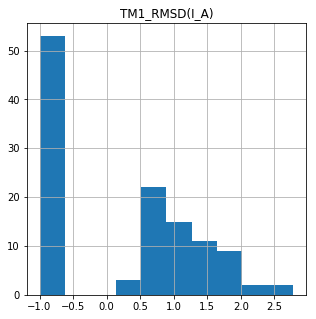

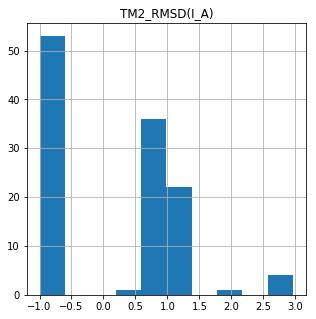

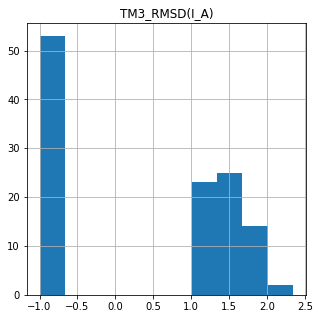

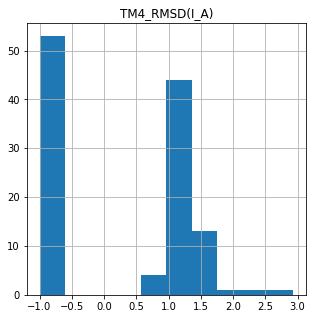

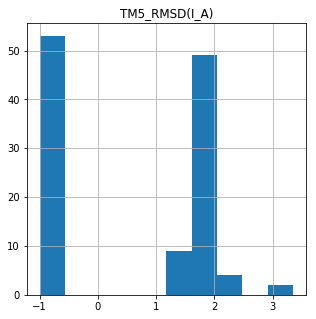

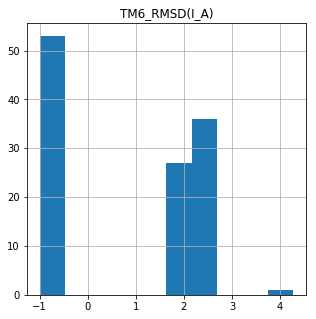

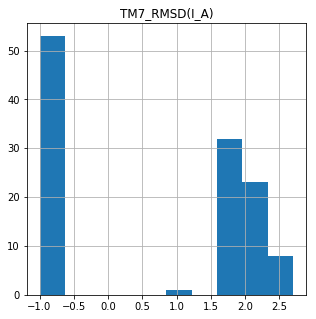

In [5]:
for tm in range (1, 8):
    name = 'TM' + str(tm) + '_RMSD(I_A)'
    data.hist(column=name, figsize=(5, 5))
#    plt.savefig('/home/andrew/Documents/Diploma/GPCRSampling/images/RMSD_I_A_old' + str(tm) + '.png', dpi=150, format='png')